# Quantum Ludolphine number

#### reference:https://en.wikipedia.org/wiki/Ludolph_van_Ceulen

In [13]:
from IPython.display import clear_output
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plotter
from qiskit.tools.monitor import job_monitor
# for visualization
import seaborn as sns, operator
sns.set_style("dark")

pi = np.pi

In [14]:
## Complex Conjugate of Wave Function using by the inverse fourier transform
def qft_dagger(circ_, n_qubits):
    """n-qubit QFTdagger the first n qubits in circ"""
    for qubit in range(int(n_qubits/2)):
        circ_.swap(qubit, n_qubits-qubit-1)
    for j in range(0,n_qubits):
        for m in range(j):
            circ_.cp(-np.pi/float(2**(j-m)), m, j)
        circ_.h(j)

In [15]:
## initial state of the quantum phase 
## attention : Set |H> state except for the last quantumbit at the first state
## then, set |1> to the last quantum bit
def qpe_pre(circ_, n_qubits):
    circ_.h(range(n_qubits))
    circ_.x(n_qubits)

    for x in reversed(range(n_qubits)):
        for _ in range(2**(n_qubits-1-x)):
            circ_.cp(1, n_qubits-1-x, n_qubits)

In [16]:
## run QISKIT
def run_job(circ, backend, shots=1000, optimization_level=0):
    t_circ = transpile(circ, backend, optimization_level=optimization_level)
    qobj = assemble(t_circ, shots=shots)
    job = backend.run(qobj)
    job_monitor(job)
    return job.result().get_counts()

In [19]:
## get IBMQ cloud quantum emulator account
from qiskit import IBMQ
IBMQ.load_account()
simulator_cloud = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = simulator_cloud.get_backend('ibmq_manila')

ibmqfactory.load_account:WARNING:2023-04-09 08:02:33,580: Credentials are already in use. The existing account in the session will be replaced.


In [20]:
simulator = Aer.get_backend('aer_simulator')

In [21]:
## obtain Ludolphine number function
## like as u1(theta)|1> = exp(2 x pi x i x theta)|1>
## run operator U = u1(theta) and |psi> = |1>, quantum phase 
## from 1 radian to theta  2^n x 1 ラジアン = the most peak cout = 2 x pi
def get_pi_estimate(n_qubits):

    # generate quantum circuit
    circ = QuantumCircuit(n_qubits + 1, n_qubits)
    # generate input state
    qpe_pre(circ, n_qubits)
    # make quantum barrier
    circ.barrier()
    # run inverse fourier transform
    qft_dagger(circ, n_qubits)
    # make quantum barrier
    circ.barrier()
    # obtain the last quantum bit
    circ.measure(range(n_qubits), range(n_qubits))

    # run job and earn results
    counts = run_job(circ, backend=simulator, shots=10000, optimization_level=0)
    # print(counts) 

    # peak value
    max_counts_result = max(counts, key=counts.get)
    max_counts_result = int(max_counts_result, 2)
    
    # estimate Ludolphie number in results
    theta = max_counts_result/2**n_qubits
    return (1./(2*theta))

In [22]:
# estimate Ludolphine number another quantum bit number
nqs = list(range(2,12+1))
pi_estimates = []
for nq in nqs:
    thisnq_pi_estimate = get_pi_estimate(nq)
    pi_estimates.append(thisnq_pi_estimate)
    print(f"{nq} qubits, pi ≈ {thisnq_pi_estimate}")

Job Status: job has successfully run
2 qubits, pi ≈ 2.0
Job Status: job has successfully run
3 qubits, pi ≈ 4.0
Job Status: job has successfully run
4 qubits, pi ≈ 2.6666666666666665
Job Status: job has successfully run
5 qubits, pi ≈ 3.2
Job Status: job has successfully run
6 qubits, pi ≈ 3.2
Job Status: job has successfully run
7 qubits, pi ≈ 3.2
Job Status: job has successfully run
8 qubits, pi ≈ 3.1219512195121952
Job Status: job has successfully run
9 qubits, pi ≈ 3.1604938271604937
Job Status: job has successfully run
10 qubits, pi ≈ 3.1411042944785277
Job Status: job has successfully run
11 qubits, pi ≈ 3.1411042944785277
Job Status: job has successfully run
12 qubits, pi ≈ 3.1411042944785277


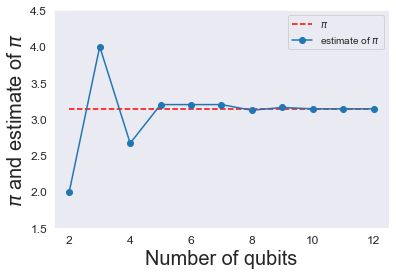

In [23]:
plotter.plot(nqs, [pi]*len(nqs), '--r')
plotter.plot(nqs, pi_estimates, '.-', markersize=12)
plotter.xlim([1.5, 12.5])
plotter.ylim([1.5, 4.5])
plotter.legend(['$\pi$', 'estimate of $\pi$'])
plotter.xlabel('Number of qubits', fontdict={'size':20})
plotter.ylabel('$\pi$ and estimate of $\pi$', fontdict={'size':20})
plotter.tick_params(axis='x', labelsize=12)
plotter.tick_params(axis='y', labelsize=12)
plotter.show()

In [24]:
import qiskit.tools.jupyter
%qiskit_version_table